In [1]:
import os, sys, re
import subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
year = "2018"
name = "templates"
picklename = year+'/'+name+'.pkl'

In [3]:
ggf = pickle.load(open(picklename,'rb')).integrate('region','signal-ggf').integrate('mjj',overflow='allnan').sum('genflavor').integrate('process','QCD').integrate('systematic','nominal')

In [4]:
ptbins = [450, 500, 550, 600, 675, 800, 1200]

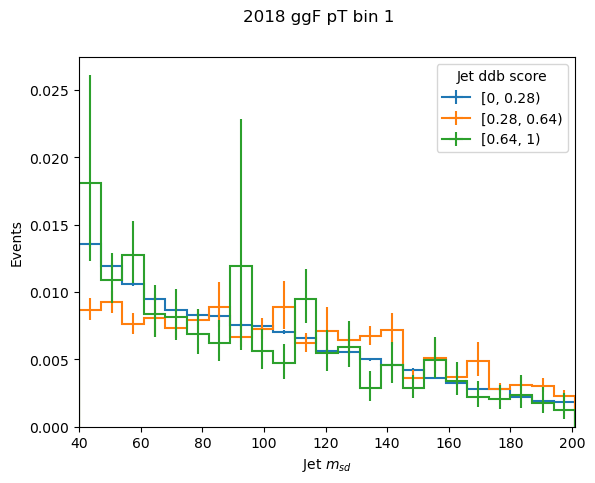

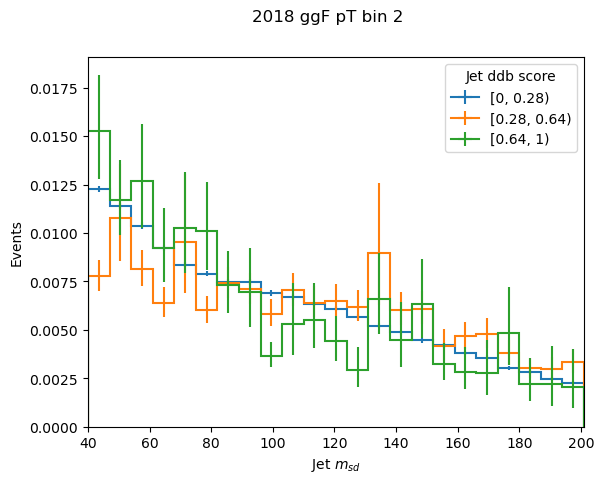

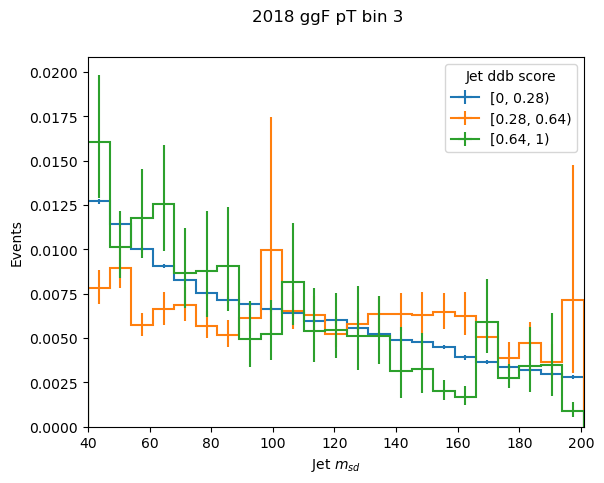

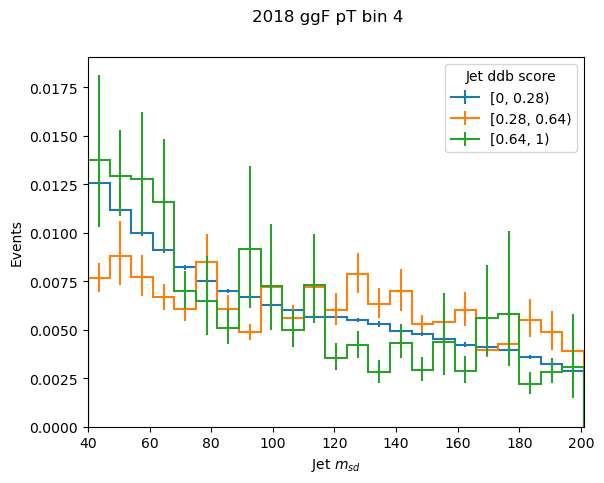

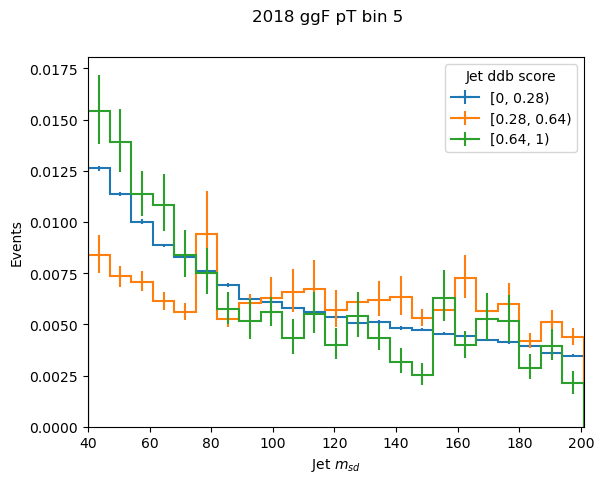

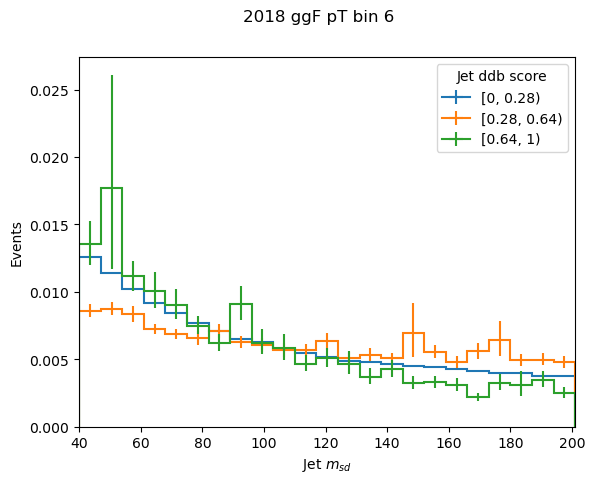

In [5]:
for i in range(0,len(ptbins)-1):
    ggf_i = ggf.integrate('pt1',int_range=slice(ptbins[i],ptbins[i+1]))
    hist.plot1d(ggf_i,overlay='ddb1',density=True)
    plt.suptitle(year+' ggF pT bin '+str(i+1))
    plt.savefig('jans-test/figures/'+year+'_ggF'+str(i+1)+'.png')
    plt.show()

In [6]:
vbf = pickle.load(open(picklename,'rb')).integrate('region','signal-vbf').sum('pt1','genflavor').integrate('systematic','nominal').integrate('process','QCD')

In [7]:
mjjbins = [1000,2000,13000]

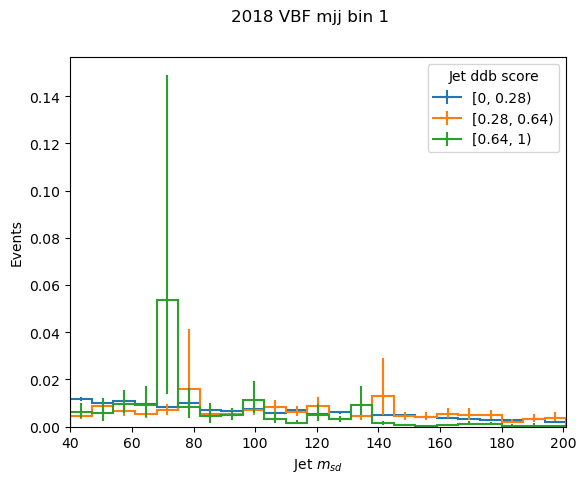

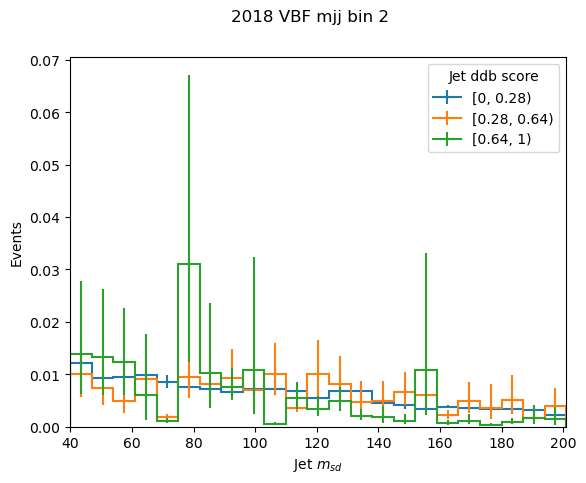

In [8]:
for i in range(0,len(mjjbins)-1):
    vbf_i = vbf.integrate('mjj',int_range=slice(mjjbins[i],mjjbins[i+1]))
    hist.plot1d(vbf_i,overlay='ddb1',density=True)
    plt.suptitle(year+' VBF mjj bin '+str(i+1))
    plt.savefig('jans-test/figures/'+year+'_VBF'+str(i+1)+'.png')
    plt.show()